<a href="https://colab.research.google.com/github/6306863958/Afame-Technologies/blob/main/face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zip_file=zipfile.ZipFile('face-mask-dataset.zip','r')
zip_file.extractall()
zip_file.close()

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_file=os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])
without_mask_file=os.listdir('/content/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])



['with_mask_3673.jpg', 'with_mask_2523.jpg', 'with_mask_2184.jpg', 'with_mask_1061.jpg', 'with_mask_2354.jpg']
['with_mask_3496.jpg', 'with_mask_566.jpg', 'with_mask_1949.jpg', 'with_mask_1997.jpg', 'with_mask_340.jpg']
['without_mask_1489.jpg', 'without_mask_916.jpg', 'without_mask_976.jpg', 'without_mask_38.jpg', 'without_mask_1675.jpg']
['without_mask_399.jpg', 'without_mask_1496.jpg', 'without_mask_2994.jpg', 'without_mask_2946.jpg', 'without_mask_1397.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_file))
print('Number of without mask images:', len(without_mask_file))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating lables for two** **class**

# with mask --> 1

# without mask --> *0*



In [9]:
lables_with_mask=[]
lables_without_mask=[]
for i in range(len(with_mask_file)):
  lables_with_mask.append(1)
for i in range(len(without_mask_file)):
  lables_without_mask.append(0)

In [10]:
print(lables_with_mask[:5])
print(lables_without_mask[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
len(lables_with_mask),len(lables_without_mask)

(3725, 3828)

In [12]:
labels = lables_with_mask + lables_without_mask

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying the Images**

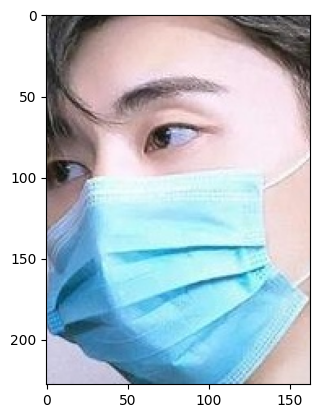

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

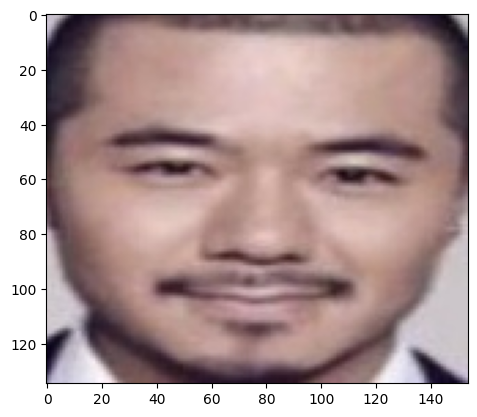

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing

# Resize the Images

# Convert the images to numpy arrays

In [15]:
with_mask_file


['with_mask_3673.jpg',
 'with_mask_2523.jpg',
 'with_mask_2184.jpg',
 'with_mask_1061.jpg',
 'with_mask_2354.jpg',
 'with_mask_13.jpg',
 'with_mask_1941.jpg',
 'with_mask_2266.jpg',
 'with_mask_3501.jpg',
 'with_mask_917.jpg',
 'with_mask_529.jpg',
 'with_mask_996.jpg',
 'with_mask_400.jpg',
 'with_mask_1693.jpg',
 'with_mask_1252.jpg',
 'with_mask_2513.jpg',
 'with_mask_3046.jpg',
 'with_mask_2095.jpg',
 'with_mask_1200.jpg',
 'with_mask_1163.jpg',
 'with_mask_2231.jpg',
 'with_mask_2488.jpg',
 'with_mask_281.jpg',
 'with_mask_1505.jpg',
 'with_mask_2882.jpg',
 'with_mask_7.jpg',
 'with_mask_2489.jpg',
 'with_mask_406.jpg',
 'with_mask_2253.jpg',
 'with_mask_3226.jpg',
 'with_mask_1939.jpg',
 'with_mask_304.jpg',
 'with_mask_148.jpg',
 'with_mask_2124.jpg',
 'with_mask_1810.jpg',
 'with_mask_2647.jpg',
 'with_mask_693.jpg',
 'with_mask_2706.jpg',
 'with_mask_1658.jpg',
 'with_mask_3554.jpg',
 'with_mask_1551.jpg',
 'with_mask_1271.jpg',
 'with_mask_907.jpg',
 'with_mask_3291.jpg',
 'w

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_file:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_file:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
print(type(data))
print(len(data))
print(data[0].shape)



<class 'list'>
7553
(128, 128, 3)


In [18]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [20]:
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [19]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

In [23]:
x_train_scaled=X_train/255
x_test_scaled=X_test/255

In [24]:
x_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99215686, 1.        ],
        [0.97647059, 1.        , 1.        ],
        [0.96470588, 0

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid')) # we add 2 node in output=> we get output in form of [x ,y] x is prob of 1 and y is prob of 0 ,which is greater output is that


In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# training the neural network
history = model.fit(x_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 230s 1s/step - loss: 0.4348 - accuracy: 0.8030 - val_loss: 0.2875 - val_accuracy: 0.8876
Epoch 2/5
170/170 [==============================] - 188s 1s/step - loss: 0.2515 - accuracy: 0.8996 - val_loss: 0.2695 - val_accuracy: 0.8926
Epoch 3/5
170/170 [==============================] - 178s 1s/step - loss: 0.2143 - accuracy: 0.9139 - val_loss: 0.2000 - val_accuracy: 0.9207
Epoch 4/5
170/170 [==============================] - 173s 1s/step - loss: 0.1767 - accuracy: 0.9334 - val_loss: 0.1827 - val_accuracy: 0.9306
Epoch 5/5
170/170 [==============================] - 180s 1s/step - loss: 0.1408 - accuracy: 0.9476 - val_loss: 0.1738 - val_accuracy: 0.9372


In [30]:
loss, accuracy = model.evaluate(x_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 28s 584ms/step - loss: 0.1722 - accuracy: 0.9477
Test Accuracy = 0.9477167725563049


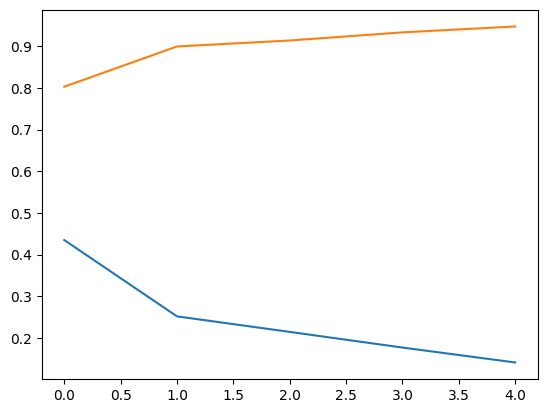

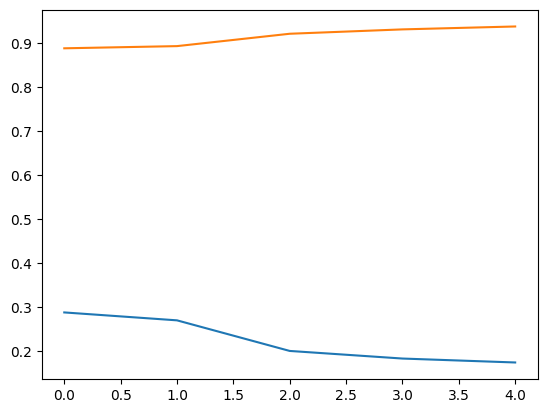

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.show()


# Prdective System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')